In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True, linewidth=120)

In [2]:
# 파일 불러오기
dta = pd.read_excel('/home/ekim_reverse/PyCode/study/Python.study/toy_project/D1_20.xlsx')

In [4]:
dta.head()

,Unnamed: 0,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,...,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,topic18,topic19
0,2015-01-01,-1095.333333,-418.000000,-671.333333,-159.333333,-982.666667,-32.666667,-38.666667,-396.666667,-704.000000,...,-22.666667,-120.000000,-100.666667,-178.000000,-125.333333,-276.000000,-78.666667,-13.333333,-64.000000,-836.666667
1,2015-01-02,-1001.266667,-584.966667,-696.900000,-105.800000,-1271.133333,-21.466667,-9.200000,-200.866667,-595.700000,...,-5.366667,-98.133333,-97.366667,-167.900000,-79.733333,-54.433333,-70.533333,-44.466667,-49.833333,-2078.433333
2,2015-01-03,179.000000,81.000000,114.000000,22.000000,171.000000,8.000000,8.000000,25.000000,95.000000,...,3.000000,37.000000,20.000000,50.000000,18.000000,9.000000,21.000000,4.000000,10.000000,436.000000
3,2015-01-04,-616.000000,-436.666667,-416.000000,-66.666667,-735.333333,-66.666667,-6.666667,-81.333333,-326.666667,...,-6.000000,-48.000000,-52.666667,-134.666667,-61.333333,-8.000000,-85.333333,-10.666667,-13.333333,-1868.000000
4,2015-01-05,31525.000000,16900.000000,16791.666667,3965.000000,32348.333333,1451.666667,390.000000,4116.666667,18351.666667,...,455.000000,3185.000000,4073.333333,5048.333333,2751.666667,801.666667,3488.333333,650.000000,325.000000,56853.333333


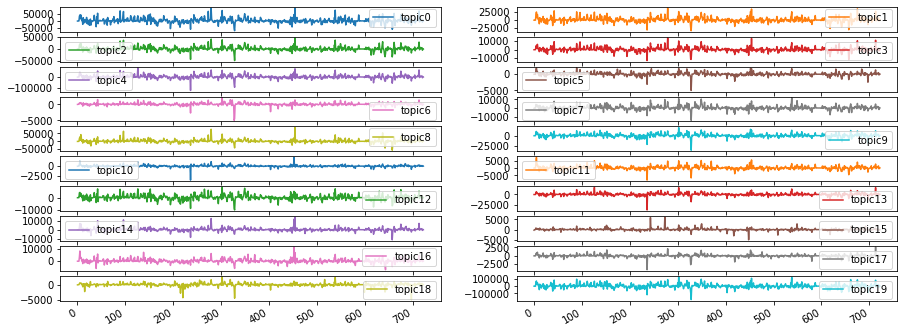

In [5]:
# 그래프로 확인하기
dta.loc[:, 'topic0':'topic19'].plot(subplots=True, layout=(10, 2), figsize=(15, 6));

In [6]:
# log취할 때 음수값이면 NaN이 뜸.
dta.min()

Unnamed: 0    2015-01-01 00:00:00
topic0                   -67327.6
topic1                   -33364.3
topic2                   -48938.3
topic3                     -12896
topic4                    -120120
topic5                    -5031.6
topic6                      -4982
topic7                   -14316.1
topic8                     -56886
topic9                   -35460.8
topic10                     -3536
topic11                     -8164
topic12                  -10302.8
topic13                    -36504
topic14                    -11438
topic15                  -4983.33
topic16                  -7058.33
topic17                     -4160
topic18                  -5003.33
topic19                   -182994
dtype: object

In [7]:
# 열 이름 변경
dta = dta.rename(columns={'Unnamed: 0':'Date'}) 

In [8]:
# index 열 변경
dta = dta.set_index("Date")

In [9]:
dta

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,topic18,topic19
Date,,,,,,,,,,,,,,,,,,,,
2015-01-01,-1095.333333,-418.000000,-671.333333,-159.333333,-982.666667,-32.666667,-38.666667,-396.666667,-704.000000,-297.333333,-22.666667,-120.000000,-100.666667,-178.000000,-125.333333,-276.000000,-78.666667,-13.333333,-64.000000,-836.666667
2015-01-02,-1001.266667,-584.966667,-696.900000,-105.800000,-1271.133333,-21.466667,-9.200000,-200.866667,-595.700000,-422.433333,-5.366667,-98.133333,-97.366667,-167.900000,-79.733333,-54.433333,-70.533333,-44.466667,-49.833333,-2078.433333
2015-01-03,179.000000,81.000000,114.000000,22.000000,171.000000,8.000000,8.000000,25.000000,95.000000,68.000000,3.000000,37.000000,20.000000,50.000000,18.000000,9.000000,21.000000,4.000000,10.000000,436.000000
2015-01-04,-616.000000,-436.666667,-416.000000,-66.666667,-735.333333,-66.666667,-6.666667,-81.333333,-326.666667,-166.000000,-6.000000,-48.000000,-52.666667,-134.666667,-61.333333,-8.000000,-85.333333,-10.666667,-13.333333,-1868.000000
2015-01-05,31525.000000,16900.000000,16791.666667,3965.000000,32348.333333,1451.666667,390.000000,4116.666667,18351.666667,9576.666667,455.000000,3185.000000,4073.333333,5048.333333,2751.666667,801.666667,3488.333333,650.000000,325.000000,56853.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-19,6248.000000,2548.333333,2229.333333,777.333333,4594.333333,128.333333,157.666667,575.666667,2365.000000,1404.333333,62.333333,524.333333,865.333333,1356.666667,275.000000,190.666667,564.666667,69.666667,128.333333,11051.333333
2016-12-20,9821.000000,6585.666667,5688.666667,1640.666667,9974.333333,483.000000,191.666667,1541.000000,4983.333333,3166.333333,145.666667,1395.333333,1288.000000,2829.000000,1165.333333,161.000000,1656.000000,214.666667,391.000000,22310.000000
2016-12-21,-8528.000000,-2938.666667,-5317.333333,-1434.666667,-6965.333333,-234.666667,-309.333333,-1760.000000,-5216.000000,-2506.666667,-53.333333,-538.666667,-810.666667,-1226.666667,-784.000000,-346.666667,-448.000000,-112.000000,-128.000000,-13472.000000


In [10]:
# log취하려고 하니, 음수때문에 NaN이 뜸.
# 따라서, 각각의 최솟값의 절댓값에 + 1 한 숫자를 더함
# 추후 함수라던지 최선책 *확인요망*

dta["topic0"] = dta["topic0"] + 67328
dta["topic1"] = dta["topic1"] + 33365
dta["topic2"] = dta["topic2"] + 48939
dta["topic3"] = dta["topic3"] + 12897
dta["topic4"] = dta["topic4"] + 120121
dta["topic5"] = dta["topic5"] + 5032
dta["topic6"] = dta["topic6"] + 4983
dta["topic7"] = dta["topic7"] + 14317
dta["topic8"] = dta["topic8"] + 56887
dta["topic9"] = dta["topic9"] + 35461
dta["topic10"] = dta["topic10"] + 3537
dta["topic11"] = dta["topic11"] + 8165
dta["topic12"] = dta["topic12"] + 10303
dta["topic13"] = dta["topic13"] + 36505
dta["topic14"] = dta["topic14"] + 11439
dta["topic15"] = dta["topic15"] + 4984
dta["topic16"] = dta["topic16"] + 7059
dta["topic17"] = dta["topic17"] + 4161
dta["topic18"] = dta["topic18"] + 5004
dta["topic19"] = dta["topic19"] + 182995

In [11]:
dta["topic0"]

Date
2015-01-01    66232.666667
2015-01-02    66326.733333
2015-01-03    67507.000000
2015-01-04    66712.000000
2015-01-05    98853.000000
                  ...     
2016-12-19    73576.000000
2016-12-20    77149.000000
2016-12-21    58800.000000
2016-12-22    66440.666667
2016-12-23    67679.000000
Name: topic0, Length: 723, dtype: float64

In [12]:
# 차분
dta['dln_topic0'] = (np.log(dta.topic0)).diff() * 100
dta['dln_topic1'] = (np.log(dta.topic1)).diff() * 100
dta['dln_topic2'] = (np.log(dta.topic2)).diff() * 100
dta['dln_topic3'] = (np.log(dta.topic3)).diff() * 100
dta['dln_topic4'] = (np.log(dta.topic4)).diff() * 100
dta['dln_topic5'] = (np.log(dta.topic5)).diff() * 100
dta['dln_topic6'] = (np.log(dta.topic6)).diff() * 100
dta['dln_topic7'] = (np.log(dta.topic7)).diff() * 100
dta['dln_topic8'] = (np.log(dta.topic8)).diff() * 100
dta['dln_topic9'] = (np.log(dta.topic9)).diff() * 100
dta['dln_topic10'] = (np.log(dta.topic10)).diff() * 100
dta['dln_topic11'] = (np.log(dta.topic11)).diff() * 100
dta['dln_topic12'] = (np.log(dta.topic12)).diff() * 100
dta['dln_topic13'] = (np.log(dta.topic13)).diff() * 100
dta['dln_topic14'] = (np.log(dta.topic14)).diff() * 100
dta['dln_topic15'] = (np.log(dta.topic15)).diff() * 100
dta['dln_topic16'] = (np.log(dta.topic16)).diff() * 100
dta['dln_topic17'] = (np.log(dta.topic17)).diff() * 100
dta['dln_topic18'] = (np.log(dta.topic18)).diff() * 100
dta['dln_topic19'] = (np.log(dta.topic19)).diff() * 100

# 표준화
dta['std_topic0'] = (dta['dln_topic0'] - dta['dln_topic0'].mean()) / dta['dln_topic0'].std()
dta['std_topic1'] = (dta['dln_topic1'] - dta['dln_topic1'].mean()) / dta['dln_topic1'].std()
dta['std_topic2'] = (dta['dln_topic2'] - dta['dln_topic2'].mean()) / dta['dln_topic2'].std()
dta['std_topic3'] = (dta['dln_topic3'] - dta['dln_topic3'].mean()) / dta['dln_topic3'].std()
dta['std_topic4'] = (dta['dln_topic4'] - dta['dln_topic4'].mean()) / dta['dln_topic4'].std()
dta['std_topic5'] = (dta['dln_topic5'] - dta['dln_topic5'].mean()) / dta['dln_topic5'].std()
dta['std_topic6'] = (dta['dln_topic6'] - dta['dln_topic6'].mean()) / dta['dln_topic6'].std()
dta['std_topic7'] = (dta['dln_topic7'] - dta['dln_topic7'].mean()) / dta['dln_topic7'].std()
dta['std_topic8'] = (dta['dln_topic8'] - dta['dln_topic8'].mean()) / dta['dln_topic8'].std()
dta['std_topic9'] = (dta['dln_topic9'] - dta['dln_topic9'].mean()) / dta['dln_topic9'].std()
dta['std_topic10'] = (dta['dln_topic10'] - dta['dln_topic10'].mean()) / dta['dln_topic10'].std()
dta['std_topic11'] = (dta['dln_topic11'] - dta['dln_topic11'].mean()) / dta['dln_topic11'].std()
dta['std_topic12'] = (dta['dln_topic12'] - dta['dln_topic12'].mean()) / dta['dln_topic12'].std()
dta['std_topic13'] = (dta['dln_topic13'] - dta['dln_topic13'].mean()) / dta['dln_topic13'].std()
dta['std_topic14'] = (dta['dln_topic14'] - dta['dln_topic14'].mean()) / dta['dln_topic14'].std()
dta['std_topic15'] = (dta['dln_topic15'] - dta['dln_topic15'].mean()) / dta['dln_topic15'].std()
dta['std_topic16'] = (dta['dln_topic16'] - dta['dln_topic16'].mean()) / dta['dln_topic16'].std()
dta['std_topic17'] = (dta['dln_topic17'] - dta['dln_topic17'].mean()) / dta['dln_topic17'].std()
dta['std_topic18'] = (dta['dln_topic18'] - dta['dln_topic18'].mean()) / dta['dln_topic18'].std()
dta['std_topic19'] = (dta['dln_topic19'] - dta['dln_topic19'].mean()) / dta['dln_topic19'].std()

In [13]:
dta

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,...,std_topic10,std_topic11,std_topic12,std_topic13,std_topic14,std_topic15,std_topic16,std_topic17,std_topic18,std_topic19
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,66232.666667,32947.000000,48267.666667,12737.666667,119138.333333,4999.333333,4944.333333,13920.333333,56183.000000,35163.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,66326.733333,32780.033333,48242.100000,12791.200000,118849.866667,5010.533333,4973.800000,14116.133333,56291.300000,35038.566667,...,0.011122,0.005245,0.000514,0.000473,0.007629,0.092875,0.002058,-0.016520,0.005544,-0.010079
2015-01-03,67507.000000,33446.000000,49053.000000,12919.000000,120292.000000,5040.000000,4991.000000,14342.000000,56982.000000,35529.000000,...,0.005346,0.032386,0.019338,0.010554,0.016291,0.025700,0.023406,0.025628,0.023390,0.020279
2015-01-04,66712.000000,32928.333333,48523.000000,12830.333333,119385.666667,4965.333333,4976.333333,14235.666667,56560.333333,35295.000000,...,-0.005804,-0.020399,-0.012002,-0.008975,-0.013281,-0.007069,-0.027307,-0.007742,-0.009153,-0.018609
2015-01-05,98853.000000,50265.000000,65730.666667,16862.000000,152469.333333,6483.666667,5373.000000,18433.666667,75238.666667,45037.666667,...,0.278534,0.654637,0.573050,0.235577,0.421044,0.304848,0.745420,0.323591,0.128007,0.412947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-19,73576.000000,35913.333333,51168.333333,13674.333333,124715.333333,5160.333333,5140.666667,14892.666667,59252.000000,36865.333333,...,0.026151,0.054016,0.057085,0.029899,0.000576,0.008504,0.056496,-0.008920,0.014768,0.031564
2016-12-20,77149.000000,39950.666667,54627.666667,14537.666667,130095.333333,5515.000000,5174.666667,15858.000000,61870.333333,38627.333333,...,0.051932,0.186489,0.062898,0.067447,0.139584,-0.011801,0.241019,0.073812,0.097392,0.082924
2016-12-21,58800.000000,30426.333333,43621.666667,11462.333333,113155.666667,4797.333333,4673.666667,12557.000000,51671.000000,32954.333333,...,-0.126130,-0.441420,-0.338430,-0.192457,-0.320255,-0.210354,-0.497897,-0.169990,-0.197508,-0.281658


In [16]:
# 표준화된 데이터 가져오기
D1 = dta.loc['2015-01-02':, 'std_topic0':'std_topic19']

In [17]:
D1

,std_topic0,std_topic1,std_topic2,std_topic3,std_topic4,std_topic5,std_topic6,std_topic7,std_topic8,std_topic9,std_topic10,std_topic11,std_topic12,std_topic13,std_topic14,std_topic15,std_topic16,std_topic17,std_topic18,std_topic19
Date,,,,,,,,,,,,,,,,,,,,
2015-01-02,0.002037,-0.008215,-0.000898,0.007235,-0.003809,0.004421,0.014308,0.026031,0.003181,-0.005599,0.011122,0.005245,0.000514,0.000473,0.007629,0.092875,0.002058,-0.016520,0.005544,-0.010079
2015-01-03,0.025822,0.032314,0.026919,0.017203,0.018806,0.011628,0.008297,0.029595,0.020335,0.021698,0.005346,0.032386,0.019338,0.010554,0.016291,0.025700,0.023406,0.025628,0.023390,0.020279
2015-01-04,-0.017417,-0.025136,-0.017610,-0.011983,-0.011832,-0.029696,-0.007144,-0.014001,-0.012442,-0.010357,-0.005804,-0.020399,-0.012002,-0.008975,-0.013281,-0.007069,-0.027307,-0.007742,-0.009153,-0.018609
2015-01-05,0.576652,0.680422,0.490859,0.473868,0.381861,0.530318,0.185130,0.483121,0.476610,0.380987,0.278534,0.654637,0.573050,0.235577,0.421044,0.304848,0.745420,0.323591,0.128007,0.412947
2015-01-06,0.131763,0.245767,0.111848,0.085353,0.083855,0.138796,0.043308,-0.063987,0.195995,0.020658,0.404006,0.576174,0.023140,0.059829,0.501505,-0.166898,0.675326,0.068423,0.108837,0.078647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-19,0.047031,0.035587,0.000757,0.018155,0.007135,-0.004350,0.039708,-0.000546,0.003167,0.013235,0.026151,0.054016,0.057085,0.029899,0.000576,0.008504,0.056496,-0.008920,0.014768,0.031564
2016-12-20,0.069497,0.171350,0.105763,0.106141,0.065912,0.132100,0.015878,0.117347,0.072192,0.072950,0.051932,0.186489,0.062898,0.067447,0.139584,-0.011801,0.241019,0.073812,0.097392,0.082924
2016-12-21,-0.398338,-0.438165,-0.363915,-0.412249,-0.217822,-0.277143,-0.245900,-0.436488,-0.300939,-0.248306,-0.126130,-0.441420,-0.338430,-0.192457,-0.320255,-0.210354,-0.497897,-0.169990,-0.197508,-0.281658


In [18]:
# 모델 만들기
mod = sm.tsa.DynamicFactor(D1, k_factors=1, factor_order=2, error_order=2) 

/home/ekim_reverse/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [19]:
initial_res = mod.fit(method='powell', disp=False)
res = mod.fit(initial_res.params, disp=False)

/home/ekim_reverse/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [20]:
print(res.summary(separate_params=False))

                                                                                                                                                                   Statespace Model Results                                                                                                                                                                   
Dep. Variable:     ['std_topic0', 'std_topic1', 'std_topic2', 'std_topic3', 'std_topic4', 'std_topic5', 'std_topic6', 'std_topic7', 'std_topic8', 'std_topic9', 'std_topic10', 'std_topic11', 'std_topic12', 'std_topic13', 'std_topic14', 'std_topic15', 'std_topic16', 'std_topic17', 'std_topic18', 'std_topic19']   No. Observations:                  722
Model:                                                                                                                                                                                                                                                                              DynamicFactor(factors=

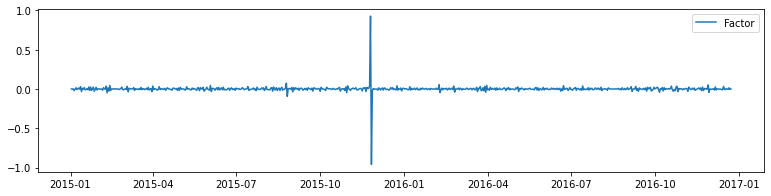

In [50]:
from pandas_datareader.data import DataReader
fig, ax = plt.subplots(figsize=(13,3))

# Plot the factor
dates = D1.index._mpl_repr()
ax.plot(dates, res.factors.filtered[0], label='Factor')
ax.legend()

# 경기침체 그래프 추가 (회색)
# start = '2015-01-02'
# end = '2016-12-23'
# rec = DataReader('USREC', 'fred', start=start, end=end)
# ylim = ax.get_ylim()
# ax.fill_between(dates[:-3], ylim[0], ylim[1], rec.values[:-4,0], facecolor='k', alpha=0.1);

In [47]:
res.factors.filtered[0]

array([ 0.0005, -0.001 ,  0.0009, -0.0215, -0.004 ,  0.0155, -0.0082,  0.0054,  0.0106, -0.0038,  0.0283, -0.0334,
        0.0082, -0.0031,  0.0173, -0.0127, -0.0045,  0.0029, -0.0105,  0.0243, -0.0175,  0.0254, -0.0193,  0.0013,
        0.0238, -0.0287, -0.0046,  0.0207, -0.0116, -0.0006,  0.0018, -0.0011, -0.0027, -0.0015, -0.0157,  0.0164,
        0.002 , -0.0018,  0.0365, -0.0494,  0.0139, -0.0271,  0.0449, -0.0167, -0.0015,  0.0009, -0.0026,  0.0033,
       -0.0004,  0.0002, -0.0005,  0.    , -0.0074, -0.0012,  0.0028,  0.0242, -0.0054, -0.012 , -0.0032,  0.0017,
       -0.0064,  0.0322, -0.0372,  0.0083,  0.0053, -0.0021,  0.0006,  0.0011,  0.0167, -0.0188,  0.0054, -0.0039,
       -0.0006, -0.0075,  0.003 , -0.0083,  0.0203, -0.0086,  0.0012,  0.0036, -0.0086, -0.002 ,  0.0086, -0.0084,
        0.0207, -0.0135, -0.0033,  0.0045, -0.0333,  0.0374, -0.0074,  0.0012,  0.0007, -0.0061, -0.0156, -0.0035,
        0.0294, -0.0079, -0.0001,  0.0037, -0.0064, -0.0008,  0.0089, -0.0168,  

In [ ]:
# max(res.factors.filtered[0]) 의 값 확인 

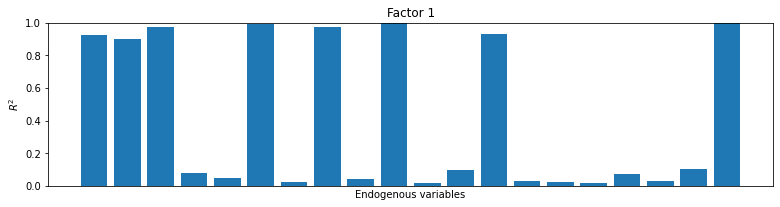

In [22]:
res.plot_coefficients_of_determination(figsize=(13,3));

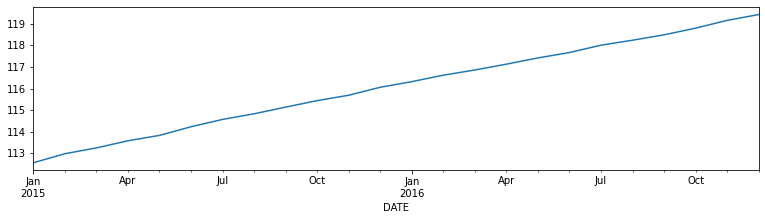

In [33]:
usphci = DataReader('USPHCI', 'fred', start='2015-01-01', end='2016-12-31')['USPHCI']
usphci.plot(figsize=(13,3));

In [37]:
def compute_coincident_index(mod, res):
    # Estimate W(1)
    spec = res.specification
    design = mod.ssm['design']
    transition = mod.ssm['transition']
    ss_kalman_gain = res.filter_results.kalman_gain[:,:,-1]  # kalman filter
    k_states = ss_kalman_gain.shape[0]

    W1 = np.linalg.inv(np.eye(k_states) - np.dot(
        np.eye(k_states) - np.dot(ss_kalman_gain, design),
        transition
    )).dot(ss_kalman_gain)[0]

    # Compute the factor mean vector
    factor_mean = np.dot(W1, dta.loc[:, 'dln_topic0':'dln_topic19'].mean())

    # Normalize the factors
    factor = res.factors.filtered[0]
    factor *= np.std(usphci.diff()[1:]) / np.std(factor)

    # Compute the coincident index
    coincident_index = np.zeros(mod.nobs+1)
#     The initial value is arbitrary; here it is set to
#     facilitate comparison
    coincident_index[0] = usphci.iloc[0] * factor_mean / dusphci.mean()
    for t in range(0, mod.nobs):
        coincident_index[t+1] = coincident_index[t] + factor[t] + factor_mean

    # Attach dates / Series
    coincident_index = pd.Series(coincident_index, index=dta.index).iloc[1:]

    # Normalize to use the same base year as USPHCI
    coincident_index *= (usphci.loc['2015-07-01'] / coincident_index.loc['2015-07-01'])

    return coincident_index

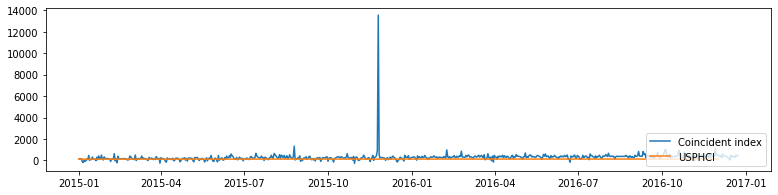

In [38]:
dusphci = usphci.diff()[1:].values
fig, ax = plt.subplots(figsize=(13,3))

# Compute the index
coincident_index = compute_coincident_index(mod, res)

# Plot the factor
dates = D1.index._mpl_repr()
ax.plot(dates, coincident_index, label='Coincident index')
ax.plot(usphci.index._mpl_repr(), usphci, label='USPHCI')
ax.legend(loc='lower right')

# Retrieve and also plot the NBER recession indicators
# ylim = ax.get_ylim()
# ax.fill_between(dates[:-3], ylim[0], ylim[1], rec.values[:-4,0], facecolor='k', alpha=0.1);

In [41]:
from statsmodels.tsa.statespace import tools
class ExtendedDFM(sm.tsa.DynamicFactor):
    def __init__(self, D1, **kwargs):
            # Setup the model as if we had a factor order of 4
            super(ExtendedDFM, self).__init__(
                D1, k_factors=1, factor_order=4, error_order=2,
                **kwargs)

            # Note: `self.parameters` is an ordered dict with the
            # keys corresponding to parameter types, and the values
            # the number of parameters of that type.
            # Add the new parameters
            self.parameters['new_loadings'] = 3

            # Cache a slice for the location of the 4 factor AR
            # parameters (a_1, ..., a_4) in the full parameter vector
            offset = (self.parameters['factor_loadings'] +
                      self.parameters['exog'] +
                      self.parameters['error_cov'])
            self._params_factor_ar = np.s_[offset:offset+2]
            self._params_factor_zero = np.s_[offset+2:offset+4]

    @property
    def start_params(self):
        # Add three new loading parameters to the end of the parameter
        # vector, initialized to zeros (for simplicity; they could
        # be initialized any way you like)
        return np.r_[super(ExtendedDFM, self).start_params, 0, 0, 0]

    @property
    def param_names(self):
        # Add the corresponding names for the new loading parameters
        #  (the name can be anything you like)
        return super(ExtendedDFM, self).param_names + [
            'loading.L%d.f1.%s' % (i, self.D1_names[3]) for i in range(1,4)]

    def transform_params(self, unconstrained):
            # Perform the typical DFM transformation (w/o the new parameters)
            constrained = super(ExtendedDFM, self).transform_params(
            unconstrained[:-3])

            # Redo the factor AR constraint, since we only want an AR(2),
            # and the previous constraint was for an AR(4)
            ar_params = unconstrained[self._params_factor_ar]
            constrained[self._params_factor_ar] = (
                tools.constrain_stationary_univariate(ar_params))

            # Return all the parameters
            return np.r_[constrained, unconstrained[-3:]]

    def untransform_params(self, constrained):
            # Perform the typical DFM untransformation (w/o the new parameters)
            unconstrained = super(ExtendedDFM, self).untransform_params(
                constrained[:-3])

            # Redo the factor AR unconstrained, since we only want an AR(2),
            # and the previous unconstrained was for an AR(4)
            ar_params = constrained[self._params_factor_ar]
            unconstrained[self._params_factor_ar] = (
                tools.unconstrain_stationary_univariate(ar_params))

            # Return all the parameters
            return np.r_[unconstrained, constrained[-3:]]

    def update(self, params, transformed=True, **kwargs):
        # Peform the transformation, if required
        if not transformed:
            params = self.transform_params(params)
        params[self._params_factor_zero] = 0

        # Now perform the usual DFM update, but exclude our new parameters
        super(ExtendedDFM, self).update(params[:-3], transformed=True, **kwargs)

        # Finally, set our new parameters in the design matrix
        self.ssm['design', 3, 1:4] = params[-3:]

In [42]:
# Create the model
extended_mod = ExtendedDFM(D1)
initial_extended_res = extended_mod.fit(maxiter=1000, disp=False)
extended_res = extended_mod.fit(initial_extended_res.params, method='nm', maxiter=1000)
print(extended_res.summary(separate_params=False))

/home/ekim_reverse/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/ekim_reverse/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


AttributeError: 'ExtendedDFM' object has no attribute 'D1_names'

In [ ]:
extended_res.plot_coefficients_of_determination(figsize=(8,2));

In [ ]:
fig, ax = plt.subplots(figsize=(13,3))

# Compute the index
extended_coincident_index = compute_coincident_index(extended_mod, extended_res)

# Plot the factor
dates = D1.index._mpl_repr()
ax.plot(dates, coincident_index, '-', linewidth=1, label='Basic model')
ax.plot(dates, extended_coincident_index, '--', linewidth=3, label='Extended model')
ax.plot(usphci.index._mpl_repr(), usphci, label='USPHCI')
ax.legend(loc='lower right')
ax.set(title='Coincident indices, comparison')

# Retrieve and also plot the NBER recession indicators
# ylim = ax.get_ylim()
# ax.fill_between(dates[:-3], ylim[0], ylim[1], rec.values[:-4,0], facecolor='k', alpha=0.1);